In [1]:
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt

## Chapter 1

In [3]:
broken_df = pd.read_csv("../data/bikes.csv", encoding="ISO-8859-1")
broken_df

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;
4,05/01/2012;197;;2;124;330;97;13;95;
...,...
305,01/11/2012;2405;;1208;1701;3082;2076;165;2461
306,02/11/2012;1582;;737;1109;2277;1392;97;1888
307,03/11/2012;844;;380;612;1137;713;105;1302
308,04/11/2012;966;;446;710;1277;692;197;1374


In [4]:
pl_broken_df = pl.read_csv("../data/bikes.csv", encoding="ISO-8859-1")
pl_broken_df

Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
str
"""01/01/2012;35;;0;38;51;26;10;1…"
"""02/01/2012;83;;1;68;153;53;6;4…"
"""03/01/2012;135;;2;104;248;89;3…"
"""04/01/2012;144;;1;116;318;111;…"
"""05/01/2012;197;;2;124;330;97;1…"
…
"""01/11/2012;2405;;1208;1701;308…"
"""02/11/2012;1582;;737;1109;2277…"
"""03/11/2012;844;;380;612;1137;7…"


In [5]:
broken_df[:3]

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;


In [6]:
pl_broken_df.head(3)

Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
str
"""01/01/2012;35;;0;38;51;26;10;1…"
"""02/01/2012;83;;1;68;153;53;6;4…"
"""03/01/2012;135;;2;104;248;89;3…"


In [7]:
fixed_df = pd.read_csv(
    "../data/bikes.csv",
    sep=";",
    encoding="latin1",
    parse_dates=["Date"],
    dayfirst=True,
    index_col="Date",
)
fixed_df[:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


In [8]:
# Polars has no index 
pl_fixed_df = pl.read_csv(
    "../data/bikes.csv",
    separator=";",
    encoding="latin1",
    try_parse_dates=True,
    dtypes={"Date": pl.Date}  # Ensure 'Date' is parsed as date
)

pl_fixed_df.head(3)

C:\Users\johan\AppData\Local\Temp\ipykernel_32404\2826052578.py:2: DeprecationWarning: The argument `dtypes` for `read_csv` is deprecated. It has been renamed to `schema_overrides`.
  pl_fixed_df = pl.read_csv(


Date,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
date,i64,str,i64,i64,i64,i64,i64,i64,str
2012-01-01,35,null,0,38,51,26,10,16,null
2012-01-02,83,null,1,68,153,53,6,43,null
2012-01-03,135,null,2,104,248,89,3,58,null


In [9]:
fixed_df["Berri 1"]

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
              ... 
2012-11-01    2405
2012-11-02    1582
2012-11-03     844
2012-11-04     966
2012-11-05    2247
Name: Berri 1, Length: 310, dtype: int64

In [10]:
pl_fixed_df.select("Berri 1")

Berri 1
i64
35
83
135
144
197
…
2405
1582
844


<Axes: xlabel='Date'>

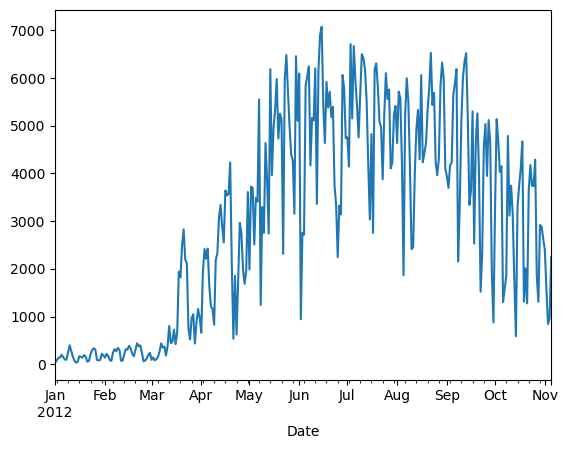

In [11]:
fixed_df["Berri 1"].plot()

In [12]:
pl_fixed_df.plot.line(x="Date", y="Berri 1")

alt.Chart(...)

<Axes: xlabel='Date'>

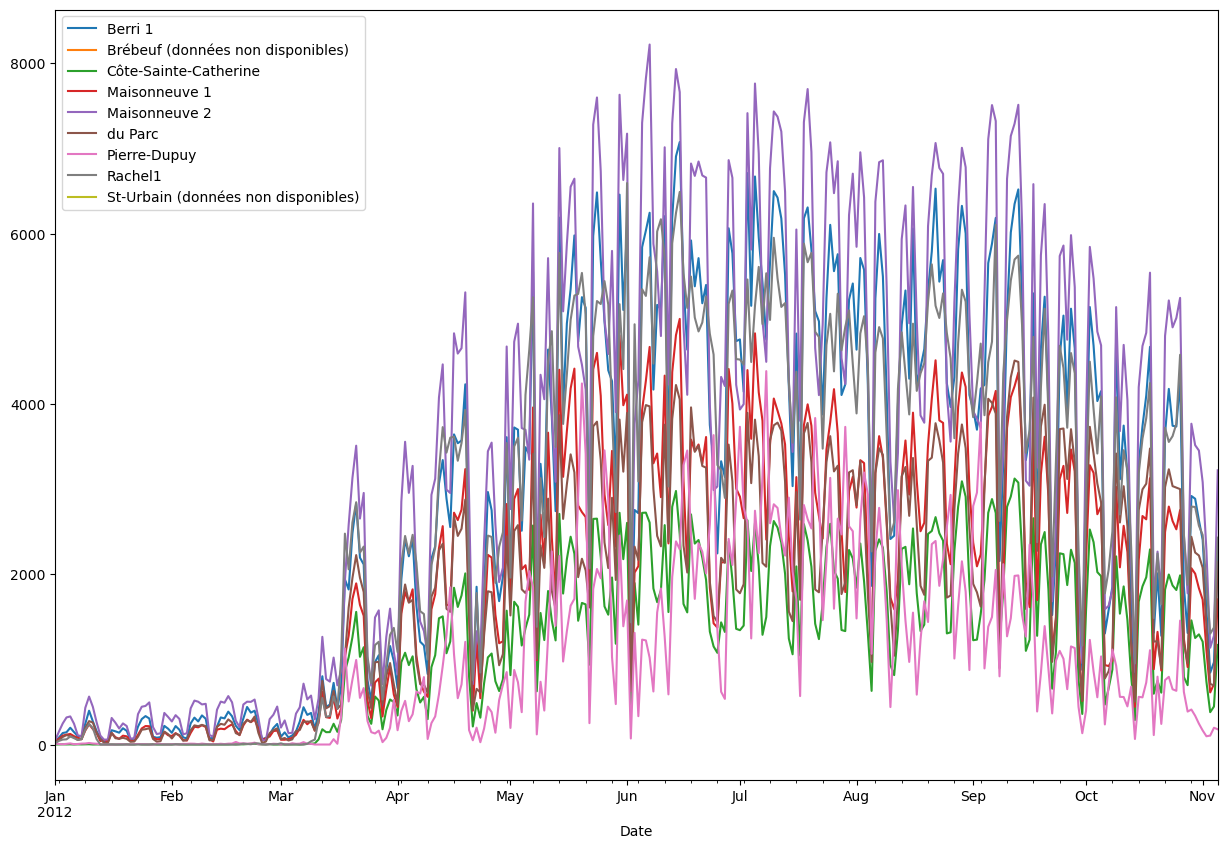

In [13]:
fixed_df.plot(figsize=(15, 10))

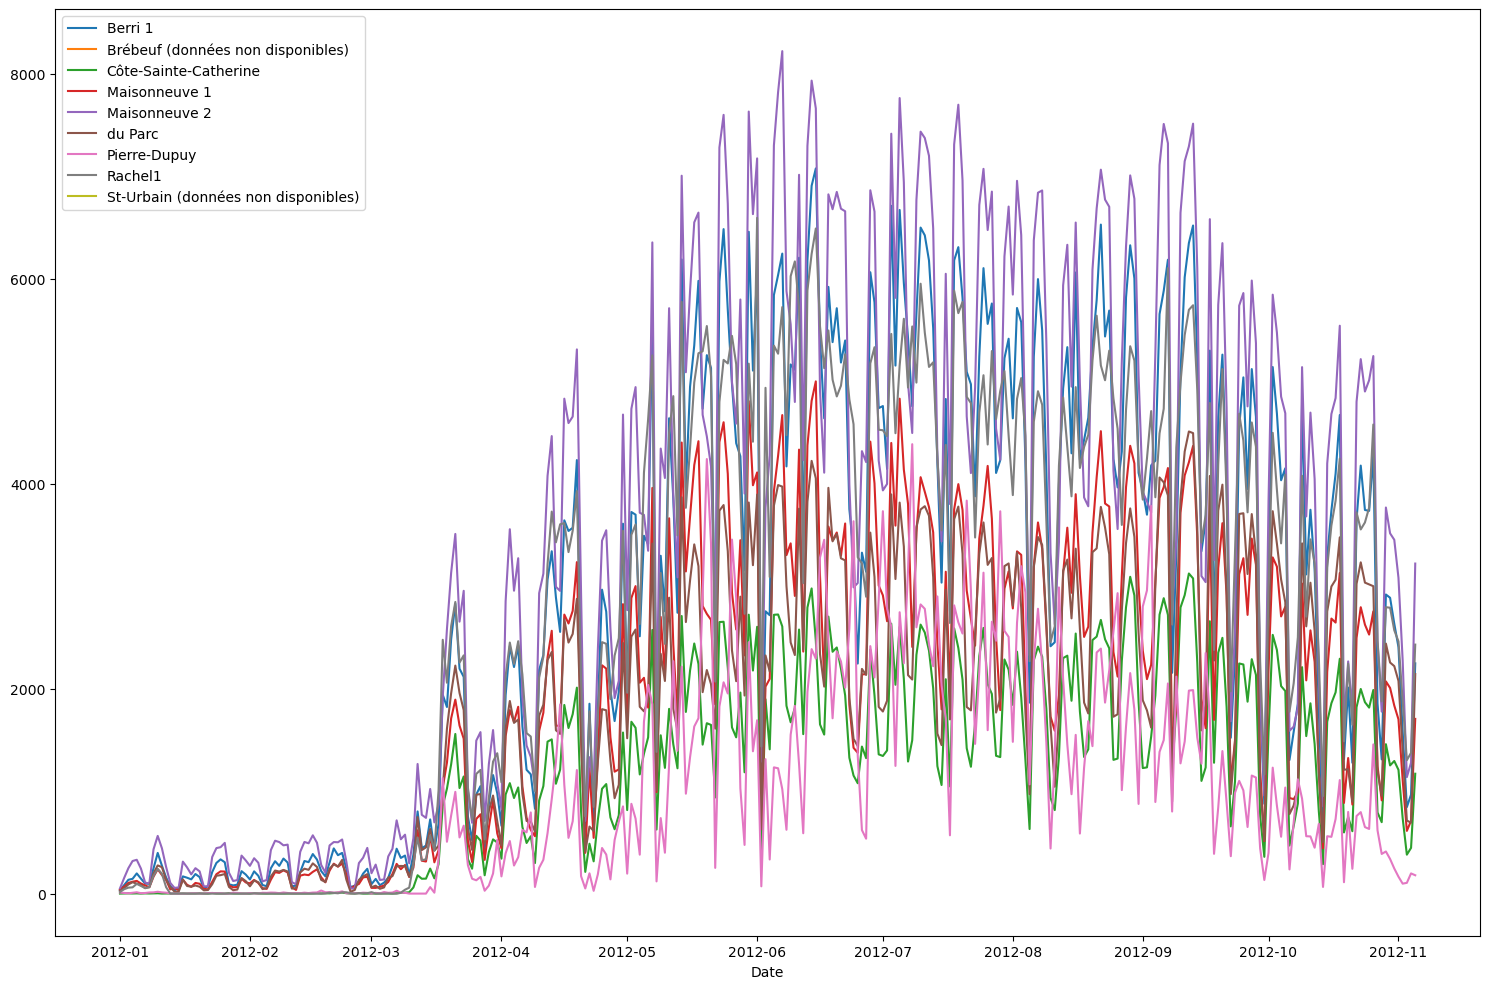

In [14]:
columns = pl_fixed_df.columns
columns.remove('Date')


plt.figure(figsize=(15, 10))
for c in columns:
    plt.plot(pl_fixed_df.select("Date"), pl_fixed_df.select(c),label = c)

plt.xlabel("Date")
plt.legend(loc="best")
plt.tight_layout()
plt.show()


    

## Chapter 2

In [16]:
complaints = pd.read_csv("../data/311-service-requests.csv", dtype="unicode")
complaints.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [17]:
pl_complaints = pl.read_csv("../data/311-service-requests.csv", infer_schema_length=0)
pl_complaints.head()

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""26589651""","""10/31/2013 02:08:41 AM""",null,"""NYPD""","""New York City Police Departmen…","""Noise - Street/Sidewalk""","""Loud Talking""","""Street/Sidewalk""","""11432""","""90-03 169 STREET""","""169 STREET""","""90 AVENUE""","""91 AVENUE""",null,null,"""ADDRESS""","""JAMAICA""",null,"""Precinct""","""Assigned""","""10/31/2013 10:08:41 AM""","""10/31/2013 02:35:17 AM""","""12 QUEENS""","""QUEENS""","""1042027""","""197389""","""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.70827532593202""","""-73.79160395779721""","""(40.70827532593202, -73.791603…"
"""26593698""","""10/31/2013 02:01:04 AM""",null,"""NYPD""","""New York City Police Departmen…","""Illegal Parking""","""Commercial Overnight Parking""","""Street/Sidewalk""","""11378""","""58 AVENUE""","""58 AVENUE""","""58 PLACE""","""59 STREET""",null,null,"""BLOCKFACE""","""MASPETH""",null,"""Precinct""","""Open""","""10/31/2013 10:01:04 AM""",null,"""05 QUEENS""","""QUEENS""","""1009349""","""201984""","""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.721040535628305""","""-73.90945306791765""","""(40.721040535628305, -73.90945…"
"""26594139""","""10/31/2013 02:00:24 AM""","""10/31/2013 02:40:32 AM""","""NYPD""","""New York City Police Departmen…","""Noise - Commercial""","""Loud Music/Party""","""Club/Bar/Restaurant""","""10032""","""4060 BROADWAY""","""BROADWAY""","""WEST 171 STREET""","""WEST 172 STREET""",null,null,"""ADDRESS""","""NEW YORK""",null,"""Precinct""","""Closed""","""10/31/2013 10:00:24 AM""","""10/31/2013 02:39:42 AM""","""12 MANHATTAN""","""MANHATTAN""","""1001088""","""246531""","""Unspecified""","""MANHATTAN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.84332975466513""","""-73.93914371913482""","""(40.84332975466513, -73.939143…"
"""26595721""","""10/31/2013 01:56:23 AM""","""10/31/2013 02:21:48 AM""","""NYPD""","""New York City Police Departmen…","""Noise - Vehicle""","""Car/Truck Horn""","""Street/Sidewalk""","""10023""","""WEST 72 STREET""","""WEST 72 STREET""","""COLUMBUS AVENUE""","""AMSTERDAM AVENUE""",null,null,"""BLOCKFACE""","""NEW YORK""",null,"""Precinct""","""Closed""","""10/31/2013 09:56:23 AM""","""10/31/2013 02:21:10 AM""","""07 MANHATTAN""","""MANHATTAN""","""989730""","""222727""","""Unspecified""","""MANHATTAN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspeci

In [18]:
complaints["Complaint Type"]

0         Noise - Street/Sidewalk
1                 Illegal Parking
2              Noise - Commercial
3                 Noise - Vehicle
4                          Rodent
                   ...           
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type, Length: 111069, dtype: object

In [19]:
pl_complaints.select("Complaint Type")

Complaint Type
str
"""Noise - Street/Sidewalk"""
"""Illegal Parking"""
"""Noise - Commercial"""
"""Noise - Vehicle"""
"""Rodent"""
…
"""Maintenance or Facility"""
"""Illegal Parking"""
"""Noise - Street/Sidewalk"""


In [20]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [21]:
pl_complaints.head(5)

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""26589651""","""10/31/2013 02:08:41 AM""",null,"""NYPD""","""New York City Police Departmen…","""Noise - Street/Sidewalk""","""Loud Talking""","""Street/Sidewalk""","""11432""","""90-03 169 STREET""","""169 STREET""","""90 AVENUE""","""91 AVENUE""",null,null,"""ADDRESS""","""JAMAICA""",null,"""Precinct""","""Assigned""","""10/31/2013 10:08:41 AM""","""10/31/2013 02:35:17 AM""","""12 QUEENS""","""QUEENS""","""1042027""","""197389""","""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.70827532593202""","""-73.79160395779721""","""(40.70827532593202, -73.791603…"
"""26593698""","""10/31/2013 02:01:04 AM""",null,"""NYPD""","""New York City Police Departmen…","""Illegal Parking""","""Commercial Overnight Parking""","""Street/Sidewalk""","""11378""","""58 AVENUE""","""58 AVENUE""","""58 PLACE""","""59 STREET""",null,null,"""BLOCKFACE""","""MASPETH""",null,"""Precinct""","""Open""","""10/31/2013 10:01:04 AM""",null,"""05 QUEENS""","""QUEENS""","""1009349""","""201984""","""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.721040535628305""","""-73.90945306791765""","""(40.721040535628305, -73.90945…"
"""26594139""","""10/31/2013 02:00:24 AM""","""10/31/2013 02:40:32 AM""","""NYPD""","""New York City Police Departmen…","""Noise - Commercial""","""Loud Music/Party""","""Club/Bar/Restaurant""","""10032""","""4060 BROADWAY""","""BROADWAY""","""WEST 171 STREET""","""WEST 172 STREET""",null,null,"""ADDRESS""","""NEW YORK""",null,"""Precinct""","""Closed""","""10/31/2013 10:00:24 AM""","""10/31/2013 02:39:42 AM""","""12 MANHATTAN""","""MANHATTAN""","""1001088""","""246531""","""Unspecified""","""MANHATTAN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,"""40.84332975466513""","""-73.93914371913482""","""(40.84332975466513, -73.939143…"
"""26595721""","""10/31/2013 01:56:23 AM""","""10/31/2013 02:21:48 AM""","""NYPD""","""New York City Police Departmen…","""Noise - Vehicle""","""Car/Truck Horn""","""Street/Sidewalk""","""10023""","""WEST 72 STREET""","""WEST 72 STREET""","""COLUMBUS AVENUE""","""AMSTERDAM AVENUE""",null,null,"""BLOCKFACE""","""NEW YORK""",null,"""Precinct""","""Closed""","""10/31/2013 09:56:23 AM""","""10/31/2013 02:21:10 AM""","""07 MANHATTAN""","""MANHATTAN""","""989730""","""222727""","""Unspecified""","""MANHATTAN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspeci

In [22]:
complaints["Complaint Type"][:5]

0    Noise - Street/Sidewalk
1            Illegal Parking
2         Noise - Commercial
3            Noise - Vehicle
4                     Rodent
Name: Complaint Type, dtype: object

In [23]:
pl_complaints.select("Complaint Type").head(5)

Complaint Type
str
"""Noise - Street/Sidewalk"""
"""Illegal Parking"""
"""Noise - Commercial"""
"""Noise - Vehicle"""
"""Rodent"""


In [24]:
complaints[["Complaint Type", "Borough"]]

,Complaint Type,Borough
0,Noise - Street/Sidewalk,QUEENS
1,Illegal Parking,QUEENS
2,Noise - Commercial,MANHATTAN
3,Noise - Vehicle,MANHATTAN
4,Rodent,MANHATTAN
...,...,...
111064,Maintenance or Facility,BROOKLYN
111065,Illegal Parking,QUEENS
111066,Noise - Street/Sidewalk,MANHATTAN
111067,Noise - Commercial,BROOKLYN


In [25]:
pl_complaints.select(["Complaint Type", "Borough"])

Complaint Type,Borough
str,str
"""Noise - Street/Sidewalk""","""QUEENS"""
"""Illegal Parking""","""QUEENS"""
"""Noise - Commercial""","""MANHATTAN"""
"""Noise - Vehicle""","""MANHATTAN"""
"""Rodent""","""MANHATTAN"""
…,…
"""Maintenance or Facility""","""BROOKLYN"""
"""Illegal Parking""","""QUEENS"""
"""Noise - Street/Sidewalk""","""MANHATTAN"""


In [26]:
complaint_counts = complaints["Complaint Type"].value_counts()
complaint_counts[:10]

Complaint Type
HEATING                   14200
GENERAL CONSTRUCTION       7471
Street Light Condition     7117
DOF Literature Request     5797
PLUMBING                   5373
PAINT - PLASTER            5149
Blocked Driveway           4590
NONCONST                   3998
Street Condition           3473
Illegal Parking            3343
Name: count, dtype: int64

In [27]:
pl_complaint_counts = pl_complaints.select(pl.col("Complaint Type").value_counts(sort=True, name="n")).head(10).unnest("Complaint Type")
pl_complaint_counts

Complaint Type,n
str,u32
"""HEATING""",14200
"""GENERAL CONSTRUCTION""",7471
"""Street Light Condition""",7117
"""DOF Literature Request""",5797
"""PLUMBING""",5373
"""PAINT - PLASTER""",5149
"""Blocked Driveway""",4590
"""NONCONST""",3998
"""Street Condition""",3473


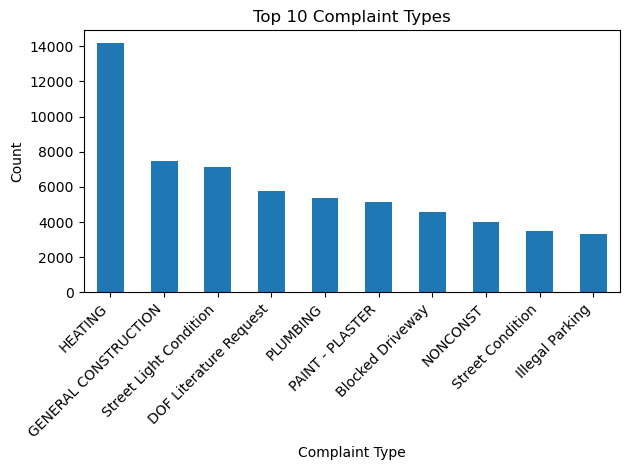

In [28]:
complaint_counts[:10].plot(kind="bar")
plt.title("Top 10 Complaint Types")
plt.xlabel("Complaint Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [29]:
pl_complaint_counts.plot.bar(x="Complaint Type", y="n").properties(width=500, title="Top 10 Complaint Types")

alt.Chart(...)

## Chapter 3

In [31]:
pd.set_option("display.max_columns", 60)
complaints = pd.read_csv("../data/311-service-requests.csv", dtype="unicode")
complaints

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027,197389,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349,201984,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088,246531,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730,222727,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815,233545,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or

In [32]:
# Specify 'Incident Zip' as a string column during CSV reading
pl_complaints = pl.read_csv(
    "../data/311-service-requests.csv",
    null_values="N/A",  # Handle 'N/A' as null values
    dtypes={"Incident Zip": pl.Utf8}  # Explicitly specify 'Incident Zip' as a string
)

pl_complaints


C:\Users\johan\AppData\Local\Temp\ipykernel_32404\2508672802.py:2: DeprecationWarning: The argument `dtypes` for `read_csv` is deprecated. It has been renamed to `schema_overrides`.
  pl_complaints = pl.read_csv(


Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
26589651,"""10/31/2013 02:08:41 AM""",null,"""NYPD""","""New York City Police Departmen…","""Noise - Street/Sidewalk""","""Loud Talking""","""Street/Sidewalk""","""11432""","""90-03 169 STREET""","""169 STREET""","""90 AVENUE""","""91 AVENUE""",null,null,"""ADDRESS""","""JAMAICA""",null,"""Precinct""","""Assigned""","""10/31/2013 10:08:41 AM""","""10/31/2013 02:35:17 AM""","""12 QUEENS""","""QUEENS""",1042027,197389,"""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.708275,-73.791604,"""(40.70827532593202, -73.791603…"
26593698,"""10/31/2013 02:01:04 AM""",null,"""NYPD""","""New York City Police Departmen…","""Illegal Parking""","""Commercial Overnight Parking""","""Street/Sidewalk""","""11378""","""58 AVENUE""","""58 AVENUE""","""58 PLACE""","""59 STREET""",null,null,"""BLOCKFACE""","""MASPETH""",null,"""Precinct""","""Open""","""10/31/2013 10:01:04 AM""",null,"""05 QUEENS""","""QUEENS""",1009349,201984,"""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.721041,-73.909453,"""(40.721040535628305, -73.90945…"
26594139,"""10/31/2013 02:00:24 AM""","""10/31/2013 02:40:32 AM""","""NYPD""","""New York City Police Departmen…","""Noise - Commercial""","""Loud Music/Party""","""Club/Bar/Restaurant""","""10032""","""4060 BROADWAY""","""BROADWAY""","""WEST 171 STREET""","""WEST 172 STREET""",null,null,"""ADDRESS""","""NEW YORK""",null,"""Precinct""","""Closed""","""10/31/2013 10:00:24 AM""","""10/31/2013 02:39:42 AM""","""12 MANHATTAN""","""MANHATTAN""",1001088,246531,"""Unspecified""","""MANHATTAN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.84333,-73.939144,"""(40.84332975466513, -73.939143…"
26595721,"""10/31/2013 01:56:23 AM""","""10/31/2013 02:21:48 AM""","""NYPD""","""New York City Police Departmen…","""Noise - Vehicle""","""Car/Truck Horn""","""Street/Sidewalk""","""10023""","""WEST 72 STREET""","""WEST 72 STREET""","""COLUMBUS AVENUE""","""AMSTERDAM AVENUE""",null,null,"""BLOCKFACE""","""NEW YORK""",null,"""Precinct""","""Closed""","""10/31/2013 09:56:23 AM""","""10/31/2013 02:21:10 AM""","""07 MANHATTAN""","""MANHATTAN""",989730,222727,"""Unspecified""","""MANHATTAN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.778009,-73.980213,"""(40.7780087446372, -73.9802134…"
26590930,"""

In [33]:
complaints[:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027,197389,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,58 AVENUE,58 PLACE,59 STREET,NaN,NaN,BLOCKFACE,MASPETH,NaN,Precinct,Open,10/31/2013 10:01:04 AM,NaN,05 QUEENS,QUEENS,1009349,201984,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,BROADWAY,WEST 171 STREET,WEST 172 STREET,NaN,NaN,ADDRESS,NEW YORK,NaN,Precinct,Closed,10/31/2013 10:00:24 AM,10/31/2013 02:39:42 AM,12 MANHATTAN,MANHATTAN,1001088,246531,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,WEST 72 STREET,COLUMBUS AVENUE,AMSTERDAM AVENUE,NaN,NaN,BLOCKFACE,NEW YORK,NaN,Precinct,Closed,10/31/2013 09:56:23 AM,10/31/2013 02:21:10 AM,07 MANHATTAN,MANHATTAN,989730,222727,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,WEST 124 STREET,LENOX AVENUE,ADAM CLAYTON POWELL JR BOULEVARD,NaN,NaN,BLOCKFACE,NEW YORK,NaN,NaN,Pending,11/30/2013 01:53:44 AM,10/31/2013 01:59:54 AM,10 MANHATTAN,MANHATTAN,998815,233545,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


In [34]:
pl_complaints.head()

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
26589651,"""10/31/2013 02:08:41 AM""",null,"""NYPD""","""New York City Police Departmen…","""Noise - Street/Sidewalk""","""Loud Talking""","""Street/Sidewalk""","""11432""","""90-03 169 STREET""","""169 STREET""","""90 AVENUE""","""91 AVENUE""",null,null,"""ADDRESS""","""JAMAICA""",null,"""Precinct""","""Assigned""","""10/31/2013 10:08:41 AM""","""10/31/2013 02:35:17 AM""","""12 QUEENS""","""QUEENS""",1042027,197389,"""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.708275,-73.791604,"""(40.70827532593202, -73.791603…"
26593698,"""10/31/2013 02:01:04 AM""",null,"""NYPD""","""New York City Police Departmen…","""Illegal Parking""","""Commercial Overnight Parking""","""Street/Sidewalk""","""11378""","""58 AVENUE""","""58 AVENUE""","""58 PLACE""","""59 STREET""",null,null,"""BLOCKFACE""","""MASPETH""",null,"""Precinct""","""Open""","""10/31/2013 10:01:04 AM""",null,"""05 QUEENS""","""QUEENS""",1009349,201984,"""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.721041,-73.909453,"""(40.721040535628305, -73.90945…"
26594139,"""10/31/2013 02:00:24 AM""","""10/31/2013 02:40:32 AM""","""NYPD""","""New York City Police Departmen…","""Noise - Commercial""","""Loud Music/Party""","""Club/Bar/Restaurant""","""10032""","""4060 BROADWAY""","""BROADWAY""","""WEST 171 STREET""","""WEST 172 STREET""",null,null,"""ADDRESS""","""NEW YORK""",null,"""Precinct""","""Closed""","""10/31/2013 10:00:24 AM""","""10/31/2013 02:39:42 AM""","""12 MANHATTAN""","""MANHATTAN""",1001088,246531,"""Unspecified""","""MANHATTAN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.84333,-73.939144,"""(40.84332975466513, -73.939143…"
26595721,"""10/31/2013 01:56:23 AM""","""10/31/2013 02:21:48 AM""","""NYPD""","""New York City Police Departmen…","""Noise - Vehicle""","""Car/Truck Horn""","""Street/Sidewalk""","""10023""","""WEST 72 STREET""","""WEST 72 STREET""","""COLUMBUS AVENUE""","""AMSTERDAM AVENUE""",null,null,"""BLOCKFACE""","""NEW YORK""",null,"""Precinct""","""Closed""","""10/31/2013 09:56:23 AM""","""10/31/2013 02:21:10 AM""","""07 MANHATTAN""","""MANHATTAN""",989730,222727,"""Unspecified""","""MANHATTAN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.778009,-73.980213,"""(40.7780087446372, -73.9802134…"
26590930,"""

In [35]:
noise_complaints = complaints[complaints["Complaint Type"] == "Noise - Street/Sidewalk"]
noise_complaints[:3]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,169 STREET,90 AVENUE,91 AVENUE,NaN,NaN,ADDRESS,JAMAICA,NaN,Precinct,Assigned,10/31/2013 10:08:41 AM,10/31/2013 02:35:17 AM,12 QUEENS,QUEENS,1042027,197389,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
16,26594086,10/31/2013 12:54:03 AM,10/31/2013 02:16:39 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10310,173 CAMPBELL AVENUE,CAMPBELL AVENUE,HENDERSON AVENUE,WINEGAR LANE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:54:03 AM,10/31/2013 02:07:14 AM,01 STATEN ISLAND,STATEN ISLAND,952013,171076,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.63618202176914,-74.1161500428337,"(40.63618202176914, -74.1161500428337)"
25,26591573,10/31/2013 12:35:18 AM,10/31/2013 02:41:35 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10312,24 PRINCETON LANE,PRINCETON LANE,HAMPTON GREEN,DEAD END,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,10/31/2013 08:35:18 AM,10/31/2013 01:45:17 AM,03 STATEN ISLAND,STATEN ISLAND,929577,140964,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.55342078716953,-74.19674315017886,"(40.55342078716953, -74.19674315017886)"


In [36]:
pl_noise_complaints = pl_complaints.filter(
    pl.col("Complaint Type") == "Noise - Street/Sidewalk"
)
pl_noise_complaints.head(3)

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
26589651,"""10/31/2013 02:08:41 AM""",null,"""NYPD""","""New York City Police Departmen…","""Noise - Street/Sidewalk""","""Loud Talking""","""Street/Sidewalk""","""11432""","""90-03 169 STREET""","""169 STREET""","""90 AVENUE""","""91 AVENUE""",null,null,"""ADDRESS""","""JAMAICA""",null,"""Precinct""","""Assigned""","""10/31/2013 10:08:41 AM""","""10/31/2013 02:35:17 AM""","""12 QUEENS""","""QUEENS""",1042027,197389,"""Unspecified""","""QUEENS""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.708275,-73.791604,"""(40.70827532593202, -73.791603…"
26594086,"""10/31/2013 12:54:03 AM""","""10/31/2013 02:16:39 AM""","""NYPD""","""New York City Police Departmen…","""Noise - Street/Sidewalk""","""Loud Music/Party""","""Street/Sidewalk""","""10310""","""173 CAMPBELL AVENUE""","""CAMPBELL AVENUE""","""HENDERSON AVENUE""","""WINEGAR LANE""",null,null,"""ADDRESS""","""STATEN ISLAND""",null,"""Precinct""","""Closed""","""10/31/2013 08:54:03 AM""","""10/31/2013 02:07:14 AM""","""01 STATEN ISLAND""","""STATEN ISLAND""",952013,171076,"""Unspecified""","""STATEN ISLAND""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.636182,-74.11615,"""(40.63618202176914, -74.116150…"
26591573,"""10/31/2013 12:35:18 AM""","""10/31/2013 02:41:35 AM""","""NYPD""","""New York City Police Departmen…","""Noise - Street/Sidewalk""","""Loud Talking""","""Street/Sidewalk""","""10312""","""24 PRINCETON LANE""","""PRINCETON LANE""","""HAMPTON GREEN""","""DEAD END""",null,null,"""ADDRESS""","""STATEN ISLAND""",null,"""Precinct""","""Closed""","""10/31/2013 08:35:18 AM""","""10/31/2013 01:45:17 AM""","""03 STATEN ISLAND""","""STATEN ISLAND""",929577,140964,"""Unspecified""","""STATEN ISLAND""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.553421,-74.196743,"""(40.55342078716953, -74.196743…"


In [37]:
is_noise = complaints["Complaint Type"] == "Noise - Street/Sidewalk"
in_brooklyn = complaints["Borough"] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:5]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
31,26595564,10/31/2013 12:30:36 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11236,AVENUE J,AVENUE J,EAST 80 STREET,EAST 81 STREET,NaN,NaN,BLOCKFACE,BROOKLYN,NaN,Precinct,Open,10/31/2013 08:30:36 AM,NaN,18 BROOKLYN,BROOKLYN,1008937,170310,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.634103775951736,-73.91105541883589,"(40.634103775951736, -73.91105541883589)"
49,26595553,10/31/2013 12:05:10 AM,10/31/2013 02:43:43 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11225,25 LEFFERTS AVENUE,LEFFERTS AVENUE,WASHINGTON AVENUE,BEDFORD AVENUE,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 08:05:10 AM,10/31/2013 01:29:29 AM,09 BROOKLYN,BROOKLYN,995366,180388,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6617931276793,-73.95993363978067,"(40.6617931276793, -73.95993363978067)"
109,26594653,10/30/2013 11:26:32 PM,10/31/2013 12:18:54 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11222,NaN,NaN,NaN,NaN,DOBBIN STREET,NORMAN STREET,INTERSECTION,BROOKLYN,NaN,Precinct,Closed,10/31/2013 07:26:32 AM,10/31/2013 12:18:54 AM,01 BROOKLYN,BROOKLYN,996925,203271,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.724599563793525,-73.95427134534344,"(40.724599563793525, -73.95427134534344)"
236,26591992,10/30/2013 10:02:58 PM,10/30/2013 10:23:20 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11218,DITMAS AVENUE,DITMAS AVENUE,NaN,NaN,NaN,NaN,LATLONG,BROOKLYN,NaN,Precinct,Closed,10/31/2013 06:02:58 AM,10/30/2013 10:23:20 PM,01 BROOKLYN,BROOKLYN,991895,171051,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.63616876563881,-73.97245504682485,"(40.63616876563881, -73.97245504682485)"
370,26594167,10/30/2013 08:38:25 PM,10/30/2013 10:26:28 PM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11218,126 BEVERLY ROAD,BEVERLY ROAD,CHURCH AVENUE,EAST 2 STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,10/31/2013 04:38:25 AM,10/30/2013 10:26:28 PM,12 BROOKLYN,BROOKLYN,990144,173511,Unspecified,BROOKLYN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.6429222774404,-73.97876175474585,"(40.6429222774404, -73.97876175474585)"


In [38]:
pl_is_noise = pl.col("Complaint Type") == "Noise - Street/Sidewalk"
pl_in_brooklyn = pl.col("Borough") == "BROOKLYN"
pl_complaints.filter(pl_is_noise & pl_in_brooklyn).head(5)

Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
26595564,"""10/31/2013 12:30:36 AM""",null,"""NYPD""","""New York City Police Departmen…","""Noise - Street/Sidewalk""","""Loud Music/Party""","""Street/Sidewalk""","""11236""","""AVENUE J""","""AVENUE J""","""EAST 80 STREET""","""EAST 81 STREET""",null,null,"""BLOCKFACE""","""BROOKLYN""",null,"""Precinct""","""Open""","""10/31/2013 08:30:36 AM""",null,"""18 BROOKLYN""","""BROOKLYN""",1008937,170310,"""Unspecified""","""BROOKLYN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.634104,-73.911055,"""(40.634103775951736, -73.91105…"
26595553,"""10/31/2013 12:05:10 AM""","""10/31/2013 02:43:43 AM""","""NYPD""","""New York City Police Departmen…","""Noise - Street/Sidewalk""","""Loud Talking""","""Street/Sidewalk""","""11225""","""25 LEFFERTS AVENUE""","""LEFFERTS AVENUE""","""WASHINGTON AVENUE""","""BEDFORD AVENUE""",null,null,"""ADDRESS""","""BROOKLYN""",null,"""Precinct""","""Closed""","""10/31/2013 08:05:10 AM""","""10/31/2013 01:29:29 AM""","""09 BROOKLYN""","""BROOKLYN""",995366,180388,"""Unspecified""","""BROOKLYN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.661793,-73.959934,"""(40.6617931276793, -73.9599336…"
26594653,"""10/30/2013 11:26:32 PM""","""10/31/2013 12:18:54 AM""","""NYPD""","""New York City Police Departmen…","""Noise - Street/Sidewalk""","""Loud Music/Party""","""Street/Sidewalk""","""11222""",null,null,null,null,"""DOBBIN STREET""","""NORMAN STREET""","""INTERSECTION""","""BROOKLYN""",null,"""Precinct""","""Closed""","""10/31/2013 07:26:32 AM""","""10/31/2013 12:18:54 AM""","""01 BROOKLYN""","""BROOKLYN""",996925,203271,"""Unspecified""","""BROOKLYN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.7246,-73.954271,"""(40.724599563793525, -73.95427…"
26591992,"""10/30/2013 10:02:58 PM""","""10/30/2013 10:23:20 PM""","""NYPD""","""New York City Police Departmen…","""Noise - Street/Sidewalk""","""Loud Talking""","""Street/Sidewalk""","""11218""","""DITMAS AVENUE""","""DITMAS AVENUE""",null,null,null,null,"""LATLONG""","""BROOKLYN""",null,"""Precinct""","""Closed""","""10/31/2013 06:02:58 AM""","""10/30/2013 10:23:20 PM""","""01 BROOKLYN""","""BROOKLYN""",991895,171051,"""Unspecified""","""BROOKLYN""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""Unspecified""","""N""",null,null,null,null,null,null,null,null,null,null,null,40.636169,-73.972455,"""(40.63616876563881, -73.972455…"
26594167,"""10/3

In [39]:
complaints[is_noise & in_brooklyn][
    ["Complaint Type", "Borough", "Created Date", "Descriptor"]
][:10]

,Complaint Type,Borough,Created Date,Descriptor
31,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:30:36 AM,Loud Music/Party
49,Noise - Street/Sidewalk,BROOKLYN,10/31/2013 12:05:10 AM,Loud Talking
109,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 11:26:32 PM,Loud Music/Party
236,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 10:02:58 PM,Loud Talking
370,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:38:25 PM,Loud Music/Party
378,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 08:32:13 PM,Loud Talking
656,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 06:07:39 PM,Loud Music/Party
1251,Noise - Street/Sidewalk,BROOKLYN,10/30/2013 03:04:51 PM,Loud Talking
5416,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 10:07:02 PM,Loud Talking
5584,Noise - Street/Sidewalk,BROOKLYN,10/29/2013 08:15:59 PM,Loud Music/Party


In [40]:
pl_complaints.filter(pl_is_noise & pl_in_brooklyn).select(
    ["Complaint Type", "Borough", "Created Date", "Descriptor"]
).head(10)

Complaint Type,Borough,Created Date,Descriptor
str,str,str,str
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/31/2013 12:30:36 AM""","""Loud Music/Party"""
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/31/2013 12:05:10 AM""","""Loud Talking"""
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/30/2013 11:26:32 PM""","""Loud Music/Party"""
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/30/2013 10:02:58 PM""","""Loud Talking"""
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/30/2013 08:38:25 PM""","""Loud Music/Party"""
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/30/2013 08:32:13 PM""","""Loud Talking"""
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/30/2013 06:07:39 PM""","""Loud Music/Party"""
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/30/2013 03:04:51 PM""","""Loud Talking"""
"""Noise - Street/Sidewalk""","""BROOKLYN""","""10/29/2013 10:07:02 PM""","""Loud Talking"""


In [41]:
is_noise = complaints["Complaint Type"] == "Noise - Street/Sidewalk"
noise_complaints = complaints[is_noise]
noise_complaints["Borough"].value_counts()

Borough
MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: count, dtype: int64

In [42]:
pl_noise_complaints = pl_complaints.filter(pl.col("Complaint Type") == "Noise - Street/Sidewalk").select(pl.col("Borough").value_counts(sort=True, name="n")).unnest("Borough")
pl_noise_complaints

Borough,n
str,u32
"""MANHATTAN""",917
"""BROOKLYN""",456
"""BRONX""",292
"""QUEENS""",226
"""STATEN ISLAND""",36
"""Unspecified""",1


In [43]:
noise_complaint_counts = noise_complaints["Borough"].value_counts()
complaint_counts = complaints["Borough"].value_counts()

noise_complaint_counts / complaint_counts.astype(float)

Borough
BRONX            0.014833
BROOKLYN         0.013864
MANHATTAN        0.037755
QUEENS           0.010143
STATEN ISLAND    0.007474
Unspecified      0.000141
Name: count, dtype: float64

In [44]:
alphabetical_pl_noise_complaints = pl_complaints.filter(pl.col("Complaint Type") == "Noise - Street/Sidewalk").select(pl.col("Borough").value_counts()).unnest("Borough").sort("Borough")
alphabetical_pl_complaint_counts = pl_complaints.select(pl.col("Borough").value_counts()).unnest("Borough").sort("Borough")
pl_noise_complaint_fraction = alphabetical_pl_noise_complaints.join(alphabetical_pl_complaint_counts, on="Borough")
pl_noise_complaint_fraction = pl_noise_complaint_fraction.with_columns((pl.col("count") / pl.col("count_right")).alias("count_ratio")).select(["Borough", "count_ratio"])
pl_noise_complaint_fraction

Borough,count_ratio
str,f64
"""BRONX""",0.014833
"""BROOKLYN""",0.013864
"""MANHATTAN""",0.037755
"""QUEENS""",0.010143
"""STATEN ISLAND""",0.007474
"""Unspecified""",0.000141


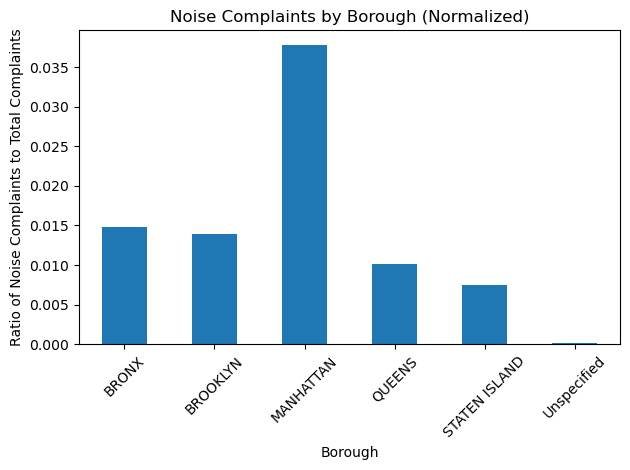

In [45]:
(noise_complaint_counts / complaint_counts.astype(float)).plot(kind="bar")
plt.title("Noise Complaints by Borough (Normalized)")
plt.xlabel("Borough")
plt.ylabel("Ratio of Noise Complaints to Total Complaints")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
pl_noise_complaint_fraction.plot.bar(x="Borough", y="count_ratio").properties(width=500, title="Noise Complaints by Borough (Normalized)")

alt.Chart(...)

## Chapter 4